# Glacier mass change data from satellite and in-situ observations: resolution and coverage for trend analysis

Production date: 31-05-2025

Dataset version: WGMS-FOG-2023-09

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Using glaciers and their mass changes as indicators for climatic changes at the regional and global scale 

## ❓ Quality assessment question
* **"Does the glacier mass change dataset have adequate spatial/temporal resolution, coverage (extent) and sampling density to derive multi-year trends in glacier mass changes, hereby enabling their use as indicators of climate change?"**

Glaciers significantly impact global sea-level rise, freshwater resources, natural hazards, hydro-power generation, recreation and tourism. Assessing glacier mass changes due to climate warming is therefore crucial for addressing these issues. The "[Glacier mass change gridded data from 1976 to present derived from the Fluctuations of Glaciers Database](https://cds.climate.copernicus.eu/datasets/derived-gridded-glacier-mass-change?tab=overview)" (version WGMS-FOG-2023-09) on the Climate Data Store (CDS), offers a global coverage of glacier mass changes by integrating in-situ, aerial, and satellite data [[1](https://wgms.ch/), [2](https://doi.org/10.5194/essd-17-1977-2025)]. The gridded glaciers mass change dataset that is on the CDS is currently one of the most complete dataset of glacier mass change data in terms of its spatial coverage. It is generally considered the main reference dataset to determine long-term glacier mass changes across the globe. 

When measured over a long period and at extended geographical scales, trends in glacier mass balance can be considered a clear indicator of global climate change [[3](https://doi.org/10.1038/s41586-019-1071-0)]. Despite some known issues, this dataset provides valuable insights into glacier mass changes across spatial and temporal scales. This notebook examines the dataset's suitability as a global climate change indicator, focusing on its resolution, coverage, and ability to reveal long-term trends in glacier mass balance.

## 📢 Quality assessment statements

```{admonition} These are the key outcomes of this assessment
:class: note

- With its consistent global coverage since 1975-76, annual temporal resolution and a spatial resolution of 0.5° x 0.5°, the dataset meets the minimum international standards concerning spatio-temporal resolution and extent for the data to be useful in climate change analysis and for climate monitoring to become possible [[4](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245)]. The dataset thus enables the detection of reliable climate trends and statistical analyses (mean, variability, trends), whereas the gridded format supports monitoring glacier mass changes at the local (pixel), regional, and global scales. Observed trends in glacier mass loss from the dataset furthermore align with theoretical models of the response of glaciers to climate warming, adding further credibility to the dataset. Additionally, majority of pixel-based linear mass change trends have been found to be statistically significant at $\alpha$ = 0.05. 
- Concerning limitations, it must be said that the dataset lacks quantitative estimates of the sampling density, despite the fact that the dataset's mass change estimates strongly depend on a small subset of annually in-situ sampled glaciers. This potentially affects glacier mass change representativeness, particularly for glaciers that are far from directly observed neighboring glaciers. Since the data represent mass changes from all glaciers within a certain grid box, users should also keep in mind that mass change are not available at the individual glacier scale, limiting applications that involve individual glaciers. Moreover, since grid cells are not of the same absolute surface area and decrease in size at higher latitudes, mass change artefacts may arise in polar regions if individual glaciers are larger than the cell size. 
```

## 📋 Methodology

### Dataset description

The mass balance of a glacier is the difference between mass gained (mainly from snow accumulation) and mass lost (by meltwater runoff or solid ice discharge into lakes/the ocean), which is the same as the net mass change of a glacier over its surface area $A$: 

$\Delta{M} = \dfrac{1}{A} \int\limits_{A} b_a dA - \dfrac{1}{A} \int\limits_{P} d_a dP$

where:

$b_a = \int\limits^{t_1}_{t_0}b_s dt$, with $b_s = ACC - ABL$ [kg m$^{-2}$ yr$^{-1}$]

$d_a = \int\limits^{t_1}_{t_0}d_g dt$, with $d_g = \rho_{i} \cdot H \cdot \overline{V_P}$ [kg m$^{-1}$ yr$^{-1}$]

The first term represents the the total annual surface mass balance (i.e. the difference between accumulation and ablation), whereas the second term encompasses the total annual ice discharge across the grounding line $g$ with perimeter $P$. Here, $\rho_{i}$ is the ice density, $H$ ice thickness and $\overline{V_P}$ the gate-perpendicular vertically averaged horizontal velocity at the grounding line location. The latter term is considered zero for land-terminating glaciers. Other terms can be included as well, such as the basal and internal mass balances.

In general, the basis for the derived gridded mass changes are individual measurements (mainly glaciological in-situ local annual surface mass balance measurements) and geodetic air or spaceborne elevation change data (a surface elevation/ice thickness change or an ice volume change over time). These data are converted into an averaged specific mass balance value (i.e. mostly reported with units of meter water equivalent and often shortened to m w.e.) for an individual glacier. Afterwards, the data are submitted to the World Glacier Monitoring Service (WGMS). Further processing of the data results in a glacier mass change product reported over a 0.5° global grid dating back until the 1975-76 hydrological year. Each grid cell therefore contains a time series of total glacier mass change (in Gt yr⁻¹) or mass balance data (in m w.e. yr⁻¹) of all glaciers within the specific grid cell. In this notebook, we use version WGMS-FOG-2023-09. For a more detailed description of the data acquisition and processing methods, we refer to the [documentation on the CDS](https://cds.climate.copernicus.eu/datasets/derived-gridded-glacier-mass-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355349383) (Copernicus Knowledge Base).

It is important to note that the glaciers with an annual glaciological sample (ca. 500 glaciers) form the basis for the determination of annual mass changes from the remaining glaciers through a complex algorithm of spatial/temporal interpolation and (area-weighted) averaging of these mass change data [[2](https://essd.copernicus.org/preprints/essd-2024-323/)]. Hence, not all glaciers in the dataset exhibit a time series of directly measured annual in-situ mass balance observations, but most glaciers in the dataset are either unobserved or only have (limited and mostly multi-annual) geodetic mass change data available. Glacier mass change data with these geodetic samples are also more prone to uncertainties in general, for example due to uncertainties related to volume to mass conversions. 

### Structure and (sub)sections

**[](section-1)**
* [](section-1-1)
* [](section-1-2)
* [](section-1-3)

**[](section-2)**
* [](section-2-1)
* [](section-2-2)
* [](section-2-3)
* [](section-2-4)

**[](section-3)**
* [](section-3-1)
* [](section-3-2)
* [](section-3-3)

**[](section-4)**

## 📈 Analysis and results

(section-1)=
### 1. Data preparation and processing

(section-1-1)=
#### 1.1 Import packages

First we load the packages:

In [1]:
import fsspec
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import xarray as xr
import rasterio.features
from rasterio.transform import from_origin
from scipy.stats import linregress
import xskillscore as xs
import os
from c3s_eqc_automatic_quality_control import download
plt.style.use("seaborn-v0_8-notebook")

(section-1-2)=
#### 1.2 Define request and download data

Then we define the parameters, i.e. for which years we want the glacier mass change data to be downloaded:

In [63]:
period_start = "1975_1976"
period_stop = "2021_2022"
assert all("_" in period and len(period) == 9 for period in (period_start, period_stop))

Define a function to calculate the sum, linear trend and acceleration:

In [64]:
# Define some functions to calculate the sum, linear trends and quadratic trends

def compute_coeff_and_pvalue(cumsum, degree):
    coeff = cumsum.polyfit("time", degree)
    (fit,) = xr.polyval(cumsum["time"], coeff).data_vars.values()
    p_value = xs.pearson_r_p_value(cumsum.chunk(time=-1), fit.chunk(time=-1), "time")
    return coeff, p_value

def compute_time_statistics(ds):
    with xr.set_options(keep_attrs=True):
        cumsum = ds["glacier_mass_change_gt"].cumsum("time").drop_vars("time")
        ds["uncertainty_gt"] = (ds["uncertainty_gt"] ** 2).sum("time") ** (1 / 2)
        non_nan_counts = ds["glacier_mass_change_gt"].count(dim="time").where(ds["glacier_mass_change_gt"].count(dim="time") != 0)

    # Sum
    ds = ds.sum("time", keep_attrs=True)
    for da in ds.data_vars.values():
        da.attrs["long_name"] = f"Sum of {da.attrs['long_name']}"

    # Linear
    coeff, p_value = compute_coeff_and_pvalue(cumsum, 1)
    ds["Slope"] = coeff["polyfit_coefficients"].sel(degree=1)
    ds["Slope"].attrs = {
        "long_name": f"Linear trend of {da.attrs['long_name']}",
        "units": f"{da.attrs['units']} yr$^{-1}$",
    }
    ds["Pvalue1"] = p_value
    ds["Pvalue1"].attrs = {
        "long_name": f"Linear p-value of {da.attrs['long_name']}",
    }

    # Quadratic
    coeff, p_value = compute_coeff_and_pvalue(cumsum, 2)
    ds["Acceleration"] = 2 * coeff["polyfit_coefficients"].sel(degree=2)
    ds["Acceleration"].attrs = {
        "long_name": f"Quadratic trend of {da.attrs['long_name']}",
        "units": f"{da.attrs['units']} yr$^{-2}$",
    }
    ds["Pvalue2"] = p_value
    ds["Pvalue2"].attrs = {
        "long_name": f"Quadratic p-value of {da.attrs['long_name']}",
    }

    return ds

def compute_spatial_statistics(ds):
    with xr.set_options(keep_attrs=True):
        return ds.sum(("latitude", "longitude"))

Then we define requests for download from the CDS and download and transform the glacier mass change data.

In [65]:
# Set request
y0_start, y1_start = map(int, period_start.split("_"))
y0_stop, y1_stop = map(int, period_stop.split("_"))
collection_id = "derived-gridded-glacier-mass-change"
request = {
    "variable": "glacier_mass_change",
    "product_version": "wgms_fog_2023_09",
    "format": "zip",
    "hydrological_year": [
        f"{y0}_{str(y1)[-2:]}"
        for y0, y1 in zip(range(y0_start, y0_stop + 1), range(y1_start, y1_stop + 1))
    ],
}

# Download glacier mass change data
print("Downloading and handling glacier mass change data...")

chunks = {"hydrological_year": 1}
ds = download.download_and_transform(
    collection_id,
    request,
    chunks=chunks,
    transform_func=compute_time_statistics,
    transform_chunks=False,
)
ds_timeseries = download.download_and_transform(
    collection_id,
    request,
)

# Customize some attributes
for obj in (ds, ds_timeseries):
    for da in obj.data_vars.values():
        da.attrs["long_name"] = da.attrs["long_name"].replace("_", " ").title()
ds_timeseries["time"] = ds_timeseries["time"].dt.year
ds_timeseries["time"].attrs |= {"long_name": "Time", "units": "yr"}

print("Downloading and data handling done.")

100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


(section-1-3)=
#### 1.3 Display and inspect data

Let us inspect the data:

In [66]:
ds_timeseries

<xarray.Dataset> Size: 487MB
Dimensions:                  (time: 47, latitude: 360, longitude: 720)
Coordinates:
  * time                     (time) int64 376B 1976 1977 1978 ... 2020 2021 2022
  * latitude                 (latitude) float64 3kB 89.75 89.25 ... -89.75
  * longitude                (longitude) float64 6kB -179.8 -179.2 ... 179.8
Data variables:
    glacier_mass_change_gt   (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    glacier_mass_change_mwe  (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    glacier_area_km2         (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    uncertainty_gt           (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    uncertainty_mwe          (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    title:                 Global gridded annual glacier mass changes
    data_version:          version-wgms-fog-2023-09
    project:               Copernicus Climate Change Service (C3S) Essential ...
    institution:           World Glacier Monitoring Service - Geography Depar...
    created_by:            Dr. Ines Dussaillant - ines.dussaillant@geo.uzh.ch
    references:            Fluctuation of Glaciers (FoG) database version wgm...
    citation:              Dussaillant, I., Bannwart, J., Paul, F., Zemp, M. ...
    conventions:           CF Version CF-1.8
    dataset_description:   Horizontal resolution: 0.5° (latitude - longitude)...
    dataset_limitations:   Grid-point artefact in polar regions: see Algorith...
    dataset_improvements:  Improvements of product version WGMS-FOG-2023-09 w...
    comments:              Conversions between annual grid point mass change ...

It is a gridded dataset at a 0.5 by 0.5 degree spatial resolution containing annual values of the total glacier mass change (in Gt yr$^{-1}$) of a grid cell (`glacier_mass_change_gt`) and its uncertainty (`uncertainty_gt`) since the 1975-76 hydrological year. Mass changes (mass balances in this case) and their uncertainty can also be extracted in units of m w.e. yr$^{-1}$ (`glacier_mass_change_mwe` and `uncertainty_mwe`). The parameterized absolute glacier surface area is furthermore also available in this dataset by the variable `glacier_area_km2`. For conversion purposes, glacier mass changes (in Gt yr$^{-1}$) can be converted into glacier mass balances (in m w.e. yr$^{-1}$) by dividing the mass changes (in Gt yr$^{-1}$ multiplied by $1*10^{12}$ to get values in kg yr$^{-1}$) by the product of the density of water (1000 kg m$^{-3}$) and the glacier area (in km$^{2}$ multiplied by $1*10^6$ to get values in m$^2$).

(section-2)=
### 2. Analysis of spatio-temporal resolution and extent of glacier mass changes

(section-2-1)=
#### 2.1 Dataset attributes: spatial and temporal resolution 

Let us print some attributes of the dataset to reveal its spatial and temporal resolution:

In [67]:
print(ds.attrs['dataset_description'])

Horizontal resolution: 0.5° (latitude - longitude), GCS_WGS_1984Temporal resolution: Annual, hydrological yearTemporal coverage: 1975/76-2021/22Observational sample: 96% of world glaciers with valid observations


The dataset has a spatial resolution of 0.5 by 0.5 degrees and a temporal resolution of 1 hydrological year. Although no specific thresholds are given for the spatial resolution of glacier mass change data by GCOS, the annual temporal resolution satisfies the minimum threshold [[4](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245)]. The data are not useable to detect mass changes at a finer temporal (e.g. short-term monthly or seasonal changes in glacier mass) or spatial (for individual glaciers) resolution, potentially limiting applications that involve individual glaciers. Note that the usage of a 0.5° grid also implies that not every grid cell has the same absolute surface area. This results in the fact that grid cells are smaller towards the poles, which can result in individual glaciers being larger than the grid surface. This, in turn, may give rise to artificial glacier mass change artefacts in those regions. This would, however, affect only glacier mass changes at local scales (pixels), and not those at the regional or regional spatial scales.

(section-2-2)=
#### 2.2 Temporal extent/coverage

Let us examine the temporal extent of the dataset:

In [68]:
print(f"The temporal extent of the glacier mass change dataset is {np.shape(ds_timeseries['time'])[0]} years.")

The temporal extent of the glacier mass change dataset is 47 years.


To determine whether this temporal extent of the glacier mass change dataset is sufficient to capture reliable temporal trends in global glacier mass changes and to use these trends as indicators of climatic changes, we turn to the literature. The Intergovernmental Panel on Climate Change (IPCC) and World Meteorological Orginization (WMO) often use 30 years as a standard period for climate normals and trend analysis to ensure that the analysis captures meaningful climatic changes rather than short-term (intra/interannual) fluctuations. We therefore consider these guidelines to be likewise applicative for glacier mass changes. When measured over a long period (> 30 years), trends in glacier mass changes or mass balances can therefore be considered a clear indicator of global climate change. Longer periods, as is here the case, provide even more robust trend estimates and reduce the influence of short-term variability. 

We can also determine the number of years that hold non-NaN mass change data for each pixel. If the pixel exhibits complete temporal coverage, the value should equal the number of years in the time dimension `time` of the dataset. Let us have this number quantified:

In [69]:
# Determine where values are present
valid_counts = ds_timeseries["glacier_mass_change_gt"].count(dim="time")
total_time_points = np.shape(ds_timeseries["time"])[0]
# Check where the number of values equals the time dimension of the dataset
full_time_series_counts = valid_counts.where(valid_counts == total_time_points)
# Count how many non-NaN values there are
count_nonnan = np.sum(~np.isnan(full_time_series_counts).values)
print(f"The number of pixels that have a time series of valid glacier mass change data of {np.shape(ds_timeseries['time'])[0]} years, which is the total number of years in the dataset, is {(100*count_time/count_nonnan):.2f}%.")

The number of pixels that have a time series of valid glacier mass change data of 47 years, which is the total number of years in the dataset, is 100.00%.


Concerning temporal aspects, the dataset thus offers data at regular and consistently spaced annual intervals that are sufficiently long in time to capture long-term glacier mass change trends at a local (individual pixels), regional or global scale. There are no gaps in the temporal data that could affect a trend analysis. In other words, the dataset exhibits a consistently complete temporal resolution and coverage, with no data gaps, which allows for reliable quantifications of glacier mass change trends. 

(section-2-3)=
#### 2.3 Spatial extent/coverage

To further assess the spatial coverage of the data, we can make use of the `glacier_area_km2` variable within the dataset. Let us plot the global glacier area over time to get an idea of how this variable looks:

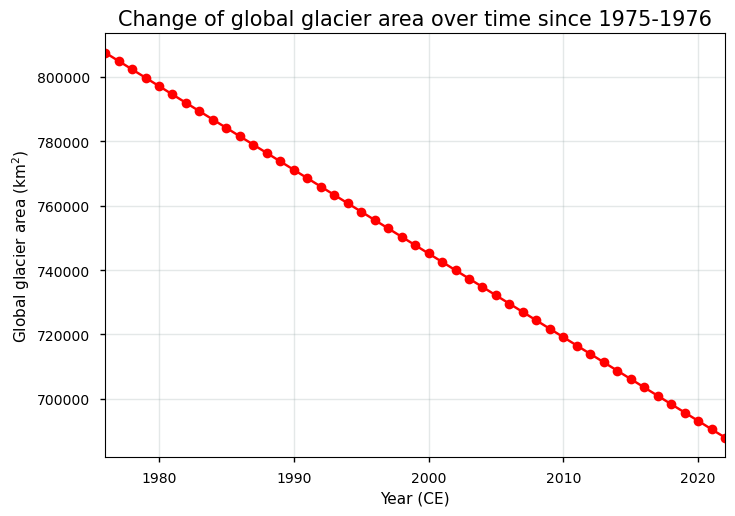

In [70]:
# Make the plot
fig, ax = plt.subplots()
ax.plot(ds_timeseries["time"],ds_timeseries["glacier_area_km2"].sum(("latitude", "longitude"), keep_attrs=True),'r',marker='o')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global glacier area (km$^2$)")
ax.set_title("Change of global glacier area over time since "+ period_start.replace("_","-"),fontsize=15);plt.show()

*Figure 1. Total global glacier area over time in the glacier mass change dataset, which results from a parameterization of estimated regional glacier area changes [[3](https://doi.org/10.1038/s41586-019-1071-0)]).*

As can be seen from the plot above, the glacier area results from a linear decrease over time. It is hence not derived from in-situ and/or remote sensing data, but rather inserted into the data as a parameterization (i.e. a linear fit to estimated regional glacier area changes, of which it is assumed that these glacier area change trends remain unchanged over time [[3](https://doi.org/10.1038/s41586-019-1071-0)]). For proper assessment, we can compare the value around 2000 CE to that of the "[Glaciers distribution data from the Randolph Glacier Inventory (RGI) for year 2000](https://cds.climate.copernicus.eu/datasets/insitu-glaciers-extent?tab=overview)" dataset, which is 746088.28 km$^2$ from the vector (shape file) product in RGI v6.0 [[5](https://www.glims.org/RGI/randolph60.html)]:

In [71]:
# Calculate the total glacier area for the year 2000
total_glacier_area_2000 = ds_timeseries["glacier_area_km2"].sel(time=2000).sum(dim=("latitude", "longitude")).compute().item()
rgi_area = 746088.28
# Determine the percentage difference
percentage_area = (total_glacier_area_2000 / rgi_area) * 100
print(f"The total global glacier area in the glacier mass change dataset in 2000 CE is {total_glacier_area_2000:.2f} km², which is {percentage_area:.2f}% of the glacier area in the RGIv6.0 dataset.")

The total global glacier area in the glacier mass change dataset in 2000 CE is 745153.82 km², which is 99.87% of the glacier area in the RGIv6.0 dataset.


(section-2-4)=
#### 2.4 Sampling density

Quantitative details about the sampling density (i.e. the number of sampled glaciers per grid point) are not given in the dataset. Nevertheless, a potential scarce observational sample of annual in-situ glaciological mass balance observations can introduce significant biases and uncertainties into the analysis of long-term trends in glacier mass changes. It is thus not possible to determine whether the data are densely sampled enough to ensure that the observed trends are reliable and not affected by sparse data. An indication of the global distribution of glaciological mass change and geodetic elevation change observations from the WGMS Fluctuations of Glaciers database is, however, available from the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355349383) (see figure below). While the glaciological sample covers ca. 500 glaciers only, the multi-annual to decadal geodetic sample covers ca. 208,000 glaciers around the globe (in total ca. 96% of the glaciers present in the RGIv6.0 dataset). The other remaining glaciers are unobserved by any means and require the complex algorithm to assign them a mass change value based on the behavior of neighboring observed glaciers. 

![alternatvie text](https://confluence.ecmwf.int/download/attachments/400511869/worddav17d9d5fbc2dc155690254b907459af22.png?version=1&modificationDate=1713359738989&api=v2)

*Figure 2. Distribution of glacier mass change records from the glaciological (red crosses) and geodetic (blue dots) samples over the 19 RGI 1st order regions (shown as black boxes with region number as label) used in the glacier mass change dataset. From: [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355349383) (Copernicus Knowledge Base).*

(section-3)=
### 3. Glacier mass change trends

(section-3-1)=
#### 3.1 Spatial distribution of linear mass change trends

Let us now express the time series of glacier mass changes at each pixel in the form of linear trends and plot them on a world map:

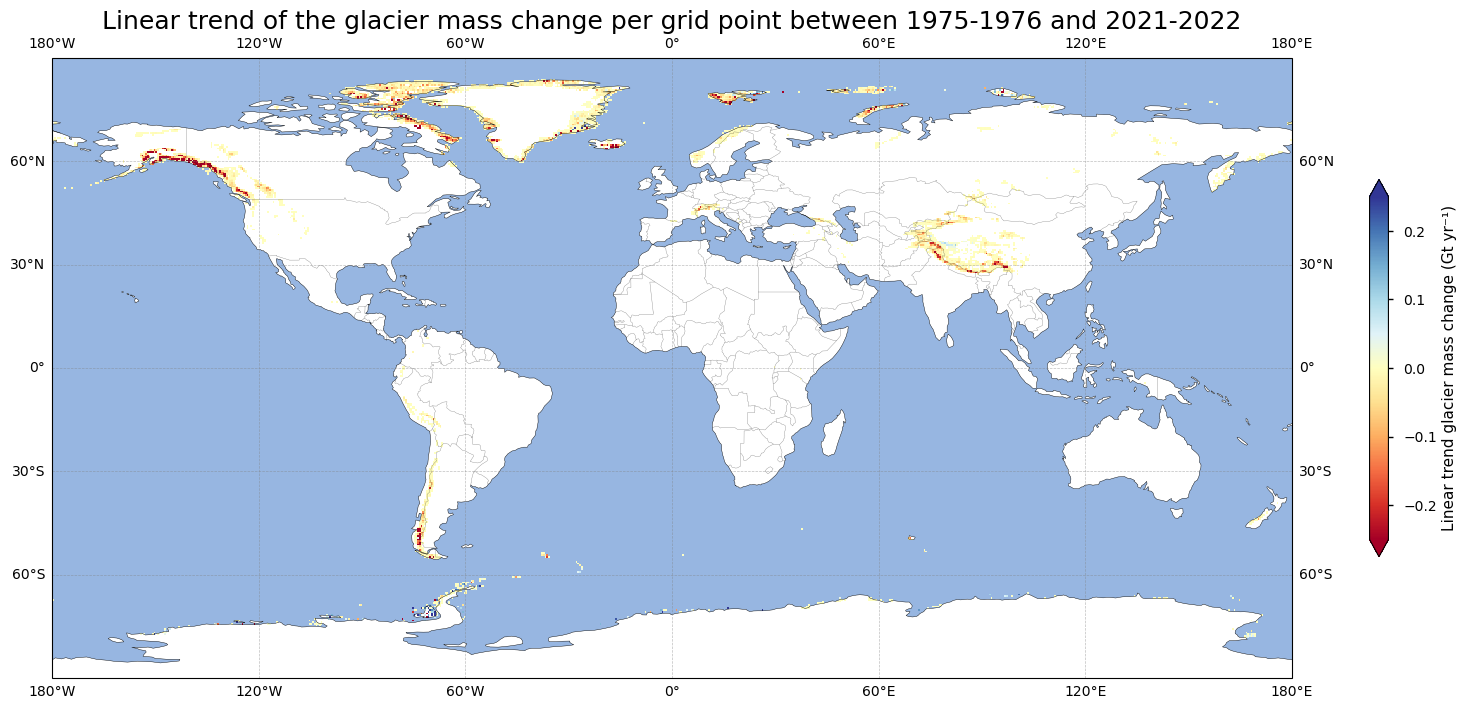

In [72]:
# Plot the gridded data
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig=plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS,linewidth=0.25,alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
         linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
im=ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, (ds)["Slope"].where((ds)['glacier_mass_change_gt'] != 0, np.nan), transform=ccrs.PlateCarree(), cmap = mpl.cm.RdYlBu, norm=mpl.colors.TwoSlopeNorm(vmin=-0.25,vcenter=0,vmax=0.25))
cb=fig.colorbar(im,ax=ax,extend='both',shrink=0.49,label='Linear trend glacier mass change (Gt yr⁻¹)')
cb.ax.set_yscale('linear')
plt.title('Linear trend of the glacier mass change per grid point between ' + period_start.replace("_", "-") + ' and ' + period_stop.replace("_", "-"), fontsize=18)
plt.show()

*<center>Figure 3. Spatial distribution of linear mass change trends (Gt/yr) for each pixel in the glacier mass change dataset.</center>*

Prominent mass loss is evident in regions such as Alaska, the western United States, the Andes, Svalbard, the Alps, and the Himalayas, where red tones (i.e. negative linear trends) dominate. In contrast, areas with mass gain are minimal, shown by isolated blue patches (i.e. positive linear trends). The plot of linear trends above underscores the persistent decrease in glacier mass over recent decades. Let us now check the statistical significance of these trends at $\alpha$ = 0.05:

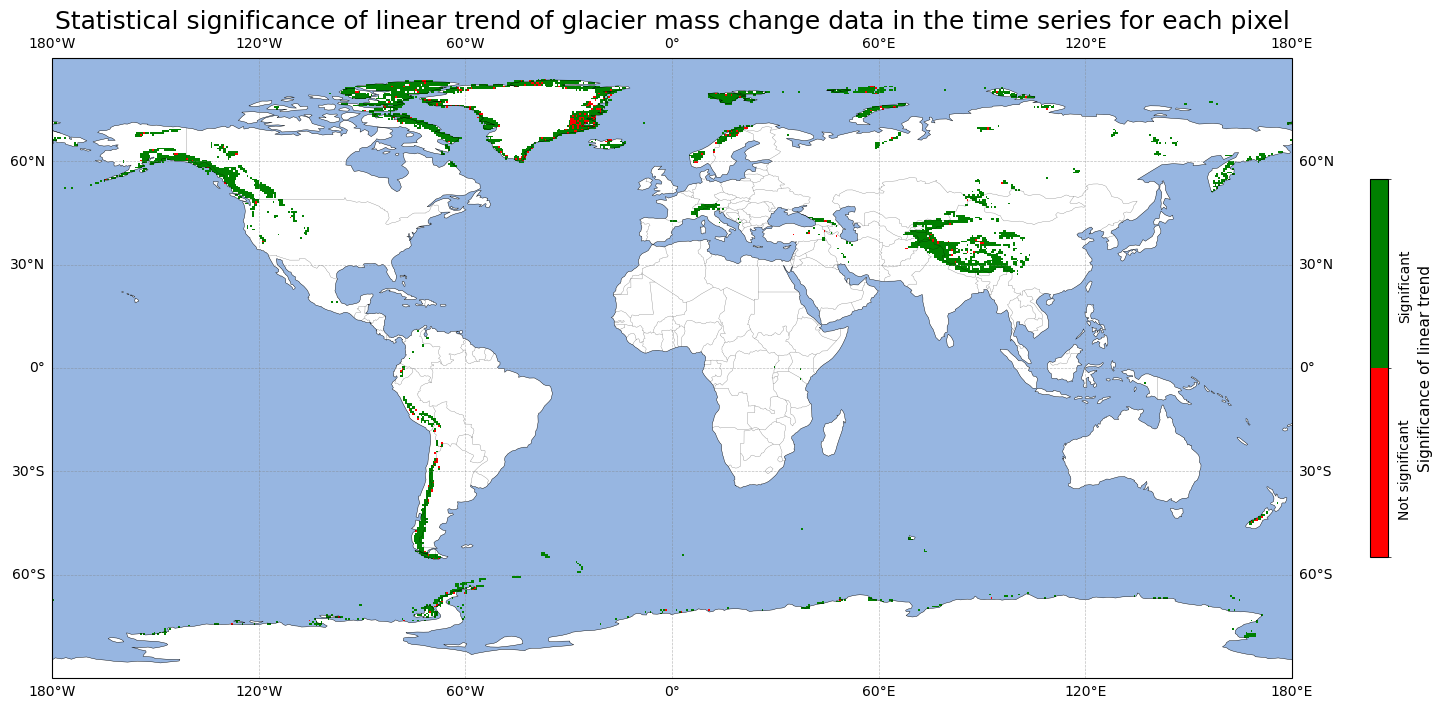

In [73]:
# Plot the gridded data
significance_level = 0.05
significant = ds["Pvalue1"].values < significance_level
# Define the boundaries for the colorbar
bounds = [0, 0.5, 1]  # Green (0), Red (1)
cmap = mpl.colors.ListedColormap(['red', 'green'])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.25, alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
significance = (ds["Pvalue1"] < significance_level).where(ds["glacier_mass_change_gt"] != 0)
# Plot the data
im = ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, significance, 
                   transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.49, label='Significance of linear trend', spacing="uniform")
cb.set_ticks([0.35, 0.80])  # Set the ticks at the midpoints of the ranges
cb.set_ticklabels([f'Not significant', f'Significant'])  # Set the tick labels
cb.ax.yaxis.set_tick_params(rotation=90)
cb.ax.yaxis.set_tick_params(length=0)
plt.title('Statistical significance of linear trend of glacier mass change data in the time series for each pixel', fontsize=18)
plt.show()

*<center>Figure 4. Statistical significance (alpha=0.05) of linear mass change trends for each pixel in the glacier mass change dataset.</center>*

Let us quantify the number of pixels where a statistically significant negative linear trend prevails:

In [74]:
# Check for pixels with negative trend
negative_trend = ds["Slope"] < 0
# Check for pixels with statistically significant trend
significant_trend = ds["Pvalue1"] < significance_level
# Both
negative_and_significant = negative_trend & significant_trend
# Count how many there are
count_non_nan_pixels = np.sum(negative_and_significant.values)
total_glacier_pixels = count_nonnan
print(f"The number of pixels with both a negative and statistically significant trend is {count_non_nan_pixels}, which is {(100*count_non_nan_pixels/total_glacier_pixels):.2f}% of the total pixels that hold glacier mass change data.")

The number of pixels with both a negative and statistically significant trend is 3590, which is 76.30% of the total pixels that hold glacier mass change data.


The above analysis indicates that the majority of the derived linear mass change trends are negative and statistically significant, adding further credibility to the glacier mass change dataset.

(section-3-2)=
#### 3.2 Trends in global total glacier mass changes

In the following section, we plot the global annual (and cumulative) glacier mass change over time. For the annual values, we therefore sum the gridded mass change product over the entire spatial domain for each individual year to get spatially summed values in Gt yr⁻¹:

$\Delta M_i 
$
[Gt yr⁻¹]
$ = \sum\limits^{x,y}\Delta {M_{x,y}}$ 

where $\Delta {M_{x,y}}$ is the glacier mass change (in Gt yr⁻¹) at pixel $x,y$ during a certain year $i$. 

The data can also be plotted in a cumulative way:

$
{\Delta M} 
$
[Gt]
$
= \sum\limits_{i={1976}}^{{{1976+n-1}}} (\Delta M_i)
$

with $n$ the total number of years in the time series. 

This results in the following plot:

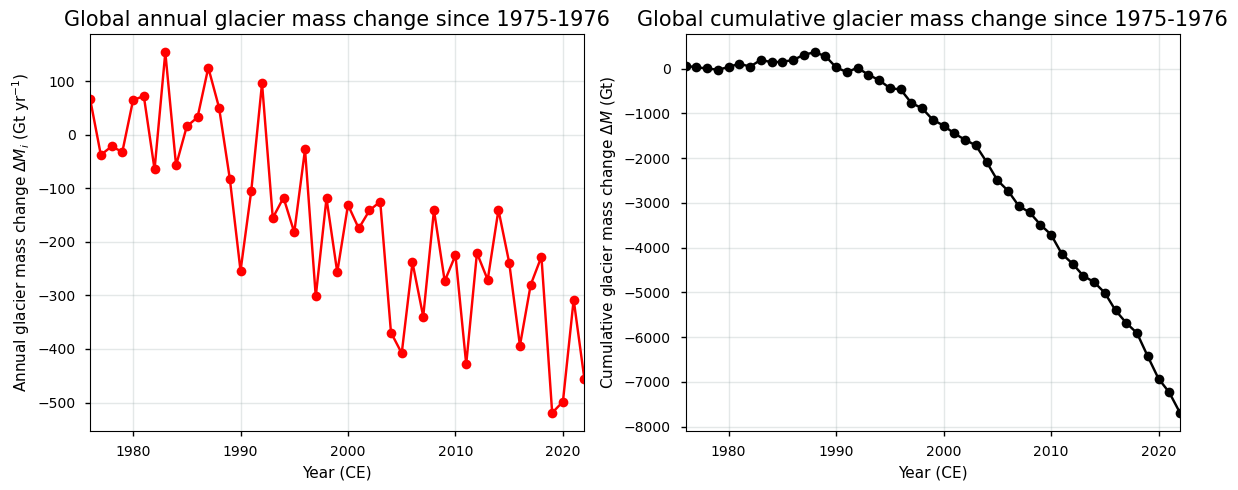

In [75]:
# Compute cumulative glacier mass change/balance and area
ds_glacier_gt = ds_timeseries["glacier_mass_change_gt"].sum(("latitude", "longitude"), keep_attrs=True)

# Plot data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(ds_timeseries["time"],ds_glacier_gt,'r',marker='o')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax1.set_xlabel("Year (CE)")
ax1.set_ylabel("Annual glacier mass change $\Delta M_i$ (Gt yr$^{-1}$)")
ax1.set_title("Global annual glacier mass change since "+ period_start.replace("_","-"),fontsize=15)
ax2.plot(ds_timeseries["time"],np.cumsum(ds_glacier_gt),'k',marker='o')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax2.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax2.set_xlabel("Year (CE)")
ax2.set_ylabel("Cumulative glacier mass change $\Delta M$ (Gt)")
ax2.set_title("Global cumulative glacier mass change since "+ period_start.replace("_","-"),fontsize=15)
plt.tight_layout()
plt.show()

*<center>Figure 5. Annual (left) and cumulative (right) global glacier mass changes in the glacier mass change dataset.</center>*

The values in the plots above align well with findings in the literature (e.g. [[9](https://doi.org/10.1038/s41586-024-08545-z)]). We can also plot the annual global glacier mass changes in the style of the popular climate [warming stripes](https://showyourstripes.info) for a better visual representation:

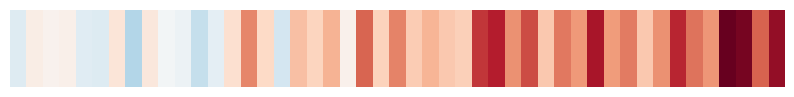

In [76]:
# Configure the figure
figure, axis = mpl.pyplot.subplots(1, 1, figsize=(10, 1))
axis.set_xlim(0, ds_glacier_gt.size)
axis.set_axis_off()
# Define a red (negative) to blue (positive) colorscale
colormap = mpl.pyplot.get_cmap('RdBu')
# Saturate colors 
normalizer = mpl.colors.Normalize(vmin=-np.max(abs(ds_glacier_gt.values)), vmax=np.max(abs(ds_glacier_gt.values)))
# Create a colored rectangle for each year
for i, value in enumerate(ds_glacier_gt):
    axis.add_patch(mpl.patches.Rectangle(
        xy=(i, 0), width=1, height=1, facecolor=colormap(normalizer(value))
    ))
# Show figure
mpl.pyplot.show()

*Figure 6. Annual global glacier mass changes from the glacier mass change dataset expressed in the form of 'warming stripes'.*

At last, we can calculate the linear and quadratic trends of the global glacier mass change time series:

In [77]:
# Extract time and glacier data
time = ds_timeseries["time"].values
glacier_gt = np.cumsum(ds_glacier_gt)
# Extract most recent 30 years
last_30_time_values = time[-30:]
last_30_glacier_gt_values = glacier_gt[-30:]
# Calculate linear trend
coeffs = np.polyfit(time, glacier_gt, 1)  # 1 indicates a linear fit (degree 1 polynomial)
trend = np.polyval(coeffs, time)  # Evaluate the polynomial at the given time points
coeffs_30 = np.polyfit(last_30_time_values, last_30_glacier_gt_values, 1)  # 1 indicates a linear fit (degree 1 polynomial)
trend_30 = np.polyval(coeffs_30, last_30_time_values)  # Evaluate the polynomial at the given time points

# coeffs[0] is the slope, coeffs[1] is the intercept
print(f"The linear trend of the global glacier mass changes between {period_start.replace('_', '-')} and {period_stop.replace('_', '-')} is {coeffs[0]:.2f} Gt yr⁻¹. During the most recent 30 years, the trend is {coeffs_30[0]:.2f} Gt yr⁻¹.")

The linear trend of the global glacier mass changes between 1975-1976 and 2021-2022 is -167.30 Gt yr⁻¹. During the most recent 30 years, the trend is -257.64 Gt yr⁻¹.


Let us have this plotted:

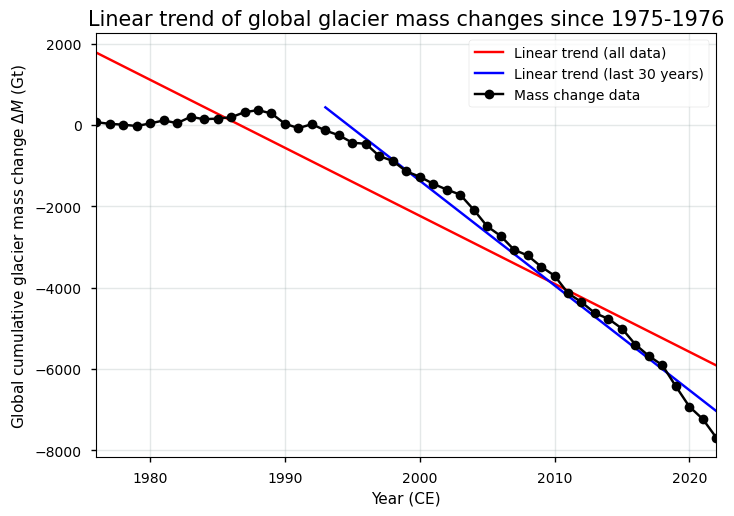

In [78]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(time,trend,'r',label='Linear trend (all data)')
ax.plot(last_30_time_values,trend_30,'b',label='Linear trend (last 30 years)')
ax.plot(time,np.cumsum(ds_glacier_gt),'k',label='Mass change data',marker='o')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(time),np.max(time))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global cumulative glacier mass change $\Delta M$ (Gt)")
ax.legend()
ax.set_title("Linear trend of global glacier mass changes since "+ period_start.replace("_","-"),fontsize=15);plt.show()

*Figure 7. Cumulative global glacier mass changes from the glacier mass change dataset and the corresponding linear trend.*

Now for the acceleration of the global glacier mass changes:

In [79]:
# Extract time and glacier data
time = ds_timeseries["time"].values
glacier_gt = np.cumsum(ds_glacier_gt)
# Calculate quadratic trend
coeffs = np.polyfit(time, glacier_gt, 2)  # 2 indicates a quadratic fit (degree 2 polynomial)
trend = np.polyval(coeffs, time)  # Evaluate the polynomial at the given time points
# Extract most recent 30 years
last_30_time_values = time[-30:]
last_30_glacier_gt_values = glacier_gt[-30:]
# Calculate quadratic trend
coeffs_30 = np.polyfit(last_30_time_values, last_30_glacier_gt_values, 2)  # 2 indicates a quadratic fit (degree 2 polynomial)
trend_30 = np.polyval(coeffs_30, last_30_time_values)  # Evaluate the polynomial at the given time points
# coeffs[0] is the quadratic term, coeffs[1] is the linear term, coeffs[2] is the intercept
print(f"The acceleration of the global glacier mass changes between {period_start.replace('_', '-')} and {period_stop.replace('_', '-')} is {(2*coeffs[0]):.2f} Gt yr⁻². During the most recent 30 years, the acceleration is {2*coeffs_30[0]:.2f} Gt yr⁻².")

The acceleration of the global glacier mass changes between 1975-1976 and 2021-2022 is -10.52 Gt yr⁻². During the most recent 30 years, the acceleration is -7.60 Gt yr⁻².


Let us have the quadratic trend plotted:

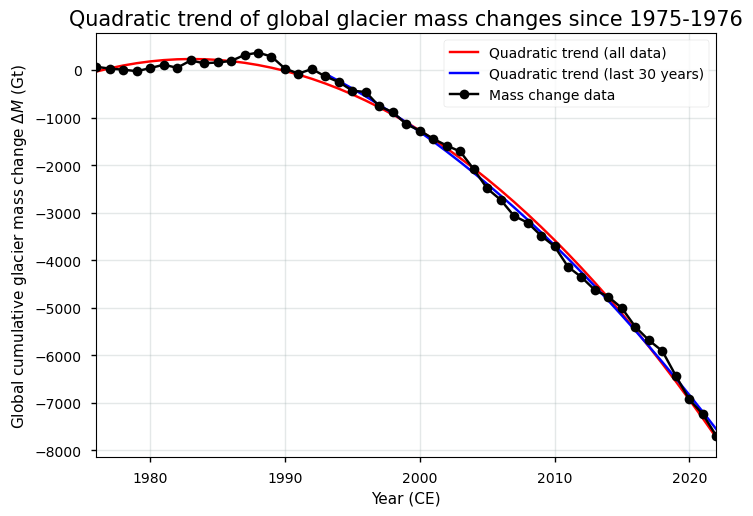

In [80]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(time,trend,'r',label='Quadratic trend (all data)')
ax.plot(last_30_time_values,trend_30,'b',label='Quadratic trend (last 30 years)')
ax.plot(time,np.cumsum(ds_glacier_gt),'k',label='Mass change data',marker='o')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(time),np.max(time))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global cumulative glacier mass change $\Delta M$ (Gt)")
ax.legend()
ax.set_title("Quadratic trend of global glacier mass changes since "+ period_start.replace("_","-"),fontsize=15);plt.show()

*Figure 8. Cumulative global glacier mass changes from the glacier mass change dataset and the corresponding quadratic trend (acceleration).*

(section-3-3)=
#### 3.3 Comparison with theoretical models

The linear trend of global glacier mass changes from 1975-1976 to 2021-2022 indicates a consistent decline. The quadratic trend shows an accelerating rate of these glacier mass losses. This suggests that the rate of global glacier mass loss has intensified over time, particularly during the more recent decades. The quadratic trend furthermore fits the observed data more closely than the linear trend, highlighting the increasing and non-linear impact of climate change on glacier mass changes. This acceleration was also noted in other glacier mass changes products [[6](https://doi.org/10.1038/s41586-021-03436-z), [7](https://doi.org/10.3389/feart.2019.00096)] and is also what can be expected from theory for a linear climate warming over time (e.g. [[8](https://doi.org/10.1007/s003820050222)]):

$\dfrac{dM}{dt} = -S_T  A_{t_0} \rho_i T'$

where $S_T$ is the mass balance sensitivity to temperature changes (m yr$^{-1}$ K$^{-1}$), $A_{t_0}$ the initial glacier surface area (m$^2$), $\rho_i$ the density of ice (kg m$^{-3}$) and $T'$ the temperature perturbation (K), which gives final units of kg yr$^{-1}$. 

By assuming a linear temperature perturbation over time (i.e. $T' = \alpha (t - t_0)$), the equation can be rewritten as (with $\alpha$ in units of K yr$^{-1}$):

$dM = -S_T A_{t_0} \rho_i T' dt = -S_T A_{t_0} \rho_i (\alpha (t - t_0)) dt$ 

or when integrating over a time period between $t$ and $t_0$:

$ \int\limits^{t}_{t_0} dM = -S_T A_{t_0} \rho_i \int\limits^{t}_{t_0} \alpha (t - t_0)dt$

and by finally assuming ${t_0}$ = 0 and $M(t_0) = 0$, we get:

$M(t) = -\dfrac{1}{2} S_T A_{t_0} \rho_i \alpha t^2$ 

or $M(t)  \approx  f(-t^2)$

which thus quantifies a quadratic (accelerated) glacier mass decrease over time, as is also noted in the glacier mass change dataset, highlighting the non-linear temperature-driven effects on global glacier mass changes.

(section-4)=
### 4. Short summary and take-home messages

When measured over long periods and extensive geographical scales, trends in glacier mass changes are clear indicators of global climate change [[3](https://doi.org/10.1038/s41586-019-1071-0), [9](https://doi.org/10.1038/s41586-024-08545-z)]. To be able to derive such trends of glacier mass changes and for climate change analysis/monitoring to become reliable and possible, the glacier mass change dataset should at least exhibit a comprehensive spatial coverage (i.e. global), a long and continuous temporal coverage (> 30 years), quantified and transparent pixel-by-pixel uncertainty estimates that meet international proposed thresholds [[4](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245)], a validation effort or a comparison to theoretical models, and an adequate spatio-temporal resolution (cfr. the "Maturity Matrix" [[10](https://doi.org/10.1175/BAMS-D-21-0109.1)]).

The [glacier mass change dataset on the CDS](https://cds.climate.copernicus.eu/datasets/derived-gridded-glacier-mass-change?tab=overview) is found to exhibit a consistent suitable spatial (0.5° x 0.5°) and temporal (annual) resolution, as well as an extensive coverage (> 30 years globally), to conduct a meaningful analysis of linear and quadratic trends in glacier mass changes at local (pixel-by-pixel), regional, and global scales. The spatial and temporal resolution/extent of the data furthermore align with international standards such as those proposed by GCOS [[4](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245)] and data gaps are practically non-existant in this dataset. The resulting linear glacier mass change trends show consistent mass loss across most pixels across the globe, while quadratic trends highlight a general accelerating rate of loss over the last several decades. These observations align well with theoretical considerations of the response of glaciers to a linear warming trend [[8](https://doi.org/10.1007/s003820050222)]. The majority of the pixel-based trends are statistically significant at $\alpha$ = 0.05, further enhancing the dataset's credibility and reliability for global climate monitoring. The corresponding glacier mass changes are all assumed to occur above sea level.

Users should, however, keep in mind that mass change artefacts may occur in polar regions due to a variable absolute surface area of the pixels, and that the dataset lacks detailed information on sampling density. The latter is important because annual in-situ glaciological samples (~500 glaciers) form the basis to infer mass changes for a much larger sample of geodetic mass change observations and unobserved glaciers [[2](https://doi.org/10.5194/essd-17-1977-2025)]. This in turn may affect the dataset's representativeness and accuracy for grid points situated far apart from directly observed glaciers. Additionally, geodetic samples in itself are already more prone to uncertainties in general, for example related to volume-to-mass conversion errors. Therefore, knowledge of the amount and spatial distribution of glaciers with a consistent and long-term glaciological sample is crucial for assessing the representativeness of the data. Despite sampling density limitations and the related uncertainties, the dataset’s robust temporal/spatial coverage and resolution make it a reliable tool for assessing glacier mass changes as an indicator of global climatic changes.

## ℹ️ If you want to know more

### Key resources

- [Glacier mass change gridded data from 1976 to present derived from the Fluctuations of Glaciers Database](https://cds.climate.copernicus.eu/datasets/derived-gridded-glacier-mass-change?tab=overview)
- [Documentation on the CDS](https://cds.climate.copernicus.eu/datasets/derived-gridded-glacier-mass-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355349383) (Copernicus Knowledge Base)
- [World Glacier Monitoring Service (WGMS)](https://wgms.ch/)
- [Glacier Mass Balance Intercomparison Exercise (GlaMBIE)](https://glambie.org/)
- [Copernicus climate change indicators: glaciers](https://climate.copernicus.eu/climate-indicators/glaciers)
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [B-Open](https://www.bopen.eu)

### References

- [[1](https://wgms.ch/)] WGMS (2022). Fluctuations of Glaciers Database. doi: 10.5904/wgms-fog-2022-09.

- [[2](https://doi.org/10.5194/essd-17-1977-2025)] Dussaillant, I., Hugonnet, R., Huss, M., Berthier, E., Bannwart, J., Paul, F., and Zemp, M. (2025). Annual mass changes for each glacier in the world from 1976 to 2023, Earth Syst. Sci. Data, https://doi.org/10.5194/essd-2024-323

- [[3](https://doi.org/10.1038/s41586-019-1071-0)] Zemp, M., Huss, M., Thibert, E., Eckert, N., McNabb, R., Huber, J., Barandun, M., Machguth, H., Nussbaumer, S. U., Gärtner-Roer, I., Thomson, L., Paul, F., Maussion, F., Kutuzov, S., and Cogley, J. G. (2019). Global glacier mass changes and their contributions to sea-level rise from 1961 to 2016. Nature, 568, 382–386. doi: 10.1038/s41586-019-1071-0.

- [[4](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245)] GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111

- [[5](https://www.glims.org/RGI/randolph60.html)] RGI Consortium (2017). Randolph Glacier Inventory – A Dataset of Global Glacier Outlines: Version 6.0: Technical Report, Global Land Ice Measurements from Space, Colorado, USA. Digital Media. doi: 10.7265/N5-RGI-60.

- [[6](https://doi.org/10.1038/s41586-021-03436-z)] Hugonnet, R., McNabb, R., Berthier, E., Menounos, B., Nuth, C., Girod, L., Huss, M., Farinotti, D., Dussaillant, I., Brun, F., and Kääb, A. (2021). Accelerated global glacier mass loss in the early twenty-first century. Nature 592, 726–731. doi: 10.1038/s41586-021-03436-z.

- [[7](https://doi.org/10.3389/feart.2019.00096)] Wouters, B., Gardner, A. S., and Moholdt, G. (2019). Global Glacier Mass Loss During the GRACE Satellite Mission (2002-2016). Front. Earth Sci. 7. doi: 10.3389/feart.2019.00096.

- [[8](https://doi.org/10.1007/s003820050222)] Oerlemans, J., Anderson, B., Hubbard, A., Huybrechts, P., Jóhannesson, T., W. H. Knap, M. Schmeits, A. P. Stroeven, R. S. W. van de Wal, J. Wallinga and Z. Zuo  (1998). Modelling the response of glaciers to climate warming. Climate Dynamics 14, 267–274. doi: 10.1007/s003820050222

- [[9](https://doi.org/10.1038/s41586-024-08545-z)] The GlaMBIE Team (2025). Community estimate of global glacier mass changes from 2000 to 2023. Nature (2025). doi: 10.1038/s41586-024-08545-z.

- [[10](https://doi.org/10.1175/BAMS-D-21-0109.1)] Yang, C. X., Cagnazzo, C., Artale, V., Nardelli, B. B., Buontempo, C., Busatto, J., Caporaso, L., Cesarini, C., Cionni, I., Coll, J., Crezee, B., Cristofanelli, P., de Toma, V., Essa, Y. H., Eyring, V., Fierli, F., Grant, L., Hassler, B., Hirschi, M., Huybrechts, P., Le Merle, E., Leonelli, F. E., Lin, X., Madonna, F., Mason, E., Massonnet, F., Marcos, M., Marullo, S., Muller, B., Obregon, A., Organelli, E., Palacz, A., Pascual, A., Pisano, A., Putero, D., Rana, A., Sanchez-Roman, A., Seneviratne, S. I., Serva, F., Storto, A., Thiery, W., Throne, P., Van Tricht, L., Verhaegen, Y., Volpe, G., and Santoleri, R. (2022). Independent Quality Assessment of Essential Climate Variables: Lessons Learned from the Copernicus Climate Change Service, B. Am. Meteorol. Soc., 103, E2032–E2049, doi: 10.1175/Bams-D-21-0109.1. 